In [10]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from matplotlib import ticker

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

In [19]:
class PureRashbeJunction(RachbaJunction):
    
    def get_boundary_matrix(self, x, E, v = False):
        self.scattering_matrix = ScatteringMatrix.above_gap if v and len(self.vel_a) != 0 else None
        self.mod = 4*["k"]
        
        self.l = [+1, -1, +1, -1]
        self.band = [1, 1, 2, 2]
        self.wave_length = [self.k_alpha(E, self.l[0], self.band[0]), 
                            self.k_alpha(E, self.l[1], self.band[1]), 
                            self.k_alpha(E, self.l[2], self.band[2]), 
                            self.k_alpha(E, self.l[3], self.band[3])]
        
        w_func = self.compile_wave_function(x, E, v = v)
        flux = self.flux(E, w_func)   
        return np.transpose(np.append(w_func, flux, axis = 1))
    
    def flux(self, E, w_func):
        res = []
        for i in range(w_func.shape[0]):
            vel_op = self.wave_length[i] * np.eye(2) - self.sgn_alpha * np.array([[1,0], [0,-1]])
            
            res.append(np.dot(vel_op, w_func[i]))
        return np.array(res, dtype=np.complex256)
    
    def omega_k(self, x, k, b):
        if b == 1:
            res = np.array([1, 0], dtype=np.complex256)
        elif b == 2:
            res = np.array([0, 1], dtype=np.complex256)
        return res*np.exp(complex(0, k*x))
    
    def k_alpha(self, E, l, b):
        if b == 1:
            return self.sgn_alpha * (1 + l* np.sqrt(1 + E/self.E_so) )
        elif b == 2:
            return -self.sgn_alpha * (1 + l* np.sqrt(1 + E/self.E_so) )
#         return res
#         return np.array([2*self.sgn_alpha*np.sqrt(self.E_so)* np.sqrt(self.E_0(E, l, m)), 
#                          np.sqrt(self.E_0(E, l, m))])
    
    def calculate_velocity(self, E):
        #[rigth lead velocity, left lead velocity]
        if len(self.vel_a) == 0 or len(self.vel_b) == 0:
            # In rigth lead: injected coefficient(a) is associated with negative l
            #               reflected coefficient(b) is associated with positive l
#             logger.debug("\t\trigth lead")
            k_s = -1
        else:
            # In left lead: injected coefficient(a) is associated with positve l
            #               reflected coefficient(b) is associated with negative ll
#             logger.debug("\t\tleft lead")
            k_s = 1
            
        vel = 0.0

        for i in range(len(self.wave_length)):
            k = self.wave_length[i]

            if k_s*self.l[i] > 0:
                if self.band[i] == 1:
                    vel = k - self.sgn_alpha
                elif self.band[i] == 2:
                    vel = k + self.sgn_alpha

#                 logger.debug(f"\t\t{i}: lambda {self.l[i]}, band {self.band[i]}, sign k: {np.sign(self.wave_length[i][1])}")
#                 logger.debug(f"\t\t-->a - velcity {vel}")

                self.vel_a.append(vel)
            elif k_s*self.l[i] < 0:
                if self.band[i] == 1:
                    vel = k - self.sgn_alpha
                elif self.band[i] == 2:
                    vel = k + self.sgn_alpha

#                 logger.debug(f"\t\t{i}: lambda {self.l[i]}, band {self.band[i]}, sign k: {np.sign(self.wave_length[i][1])}")
#                 logger.debug(f"\t\t-->b - velcity {vel}")

                self.vel_b.append(vel)

In [38]:
alp_l_to_alp_r = 0.1
E_SO_R = 10
E_SO_L = alp_l_to_alp_r * E_SO_R

Eso_profile = [-E_SO_L, E_SO_R]
x_profile = [0]
 
junction = PureRashbeJunction([x_profile, Eso_profile])

def g(x, par):
#     junction[1] = -par
#     if x < -1 and np.abs(1/par) < 0.5 or -np.abs(1/par)*(1+(1/(2*np.abs(1/par)))**2) > x:
#         return np.nan
#     else:
#         junction[0] = alp_l_to_alp_r / par
#         junction[1] = 1/par
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef


E_z_to_alpha_l = [1]

enn = np.arange(-E_SO_L + 1E-2, 10, 0.011)
trasmission_coeff_total = make_grid(enn, E_z_to_alpha_l, [g])#[g, gp])

Scattering matrix isn't unitary
not unitary matrix length: -0.99, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.979, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.968, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.957, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.946, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.9349999999999999, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.9239999999999999, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.9129999999999999, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.9019999999999999, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.8909999999999999, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.8799999999999999, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: -0.8689999999999999, E_so: 1
Scattering

Scattering matrix isn't unitary
not unitary matrix length: 1.1220000000000019, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.133000000000002, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.1440000000000021, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.1550000000000018, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.166000000000002, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.177000000000002, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.1880000000000017, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.1990000000000018, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.210000000000002, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.221000000000002, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 1.2320000000000022, E_so: 1
Scattering matrix isn't unitary
not unitary matr

Scattering matrix isn't unitary
not unitary matrix length: 3.4100000000000037, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.421000000000004, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.432000000000004, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.443000000000004, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.454000000000004, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.4650000000000034, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.4760000000000035, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.4870000000000037, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.4980000000000038, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.509000000000004, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 3.520000000000004, E_so: 1
Scattering matrix isn't unitary
not unitary matri

not unitary matrix length: 5.533000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.544000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.555000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.566000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.577000000000005, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.588000000000005, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.5990000000000055, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.610000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.621000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.632000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.643000000000006, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 5.654000000000005, E_so: 1

not unitary matrix length: 7.403000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.414000000000007, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.425000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.436000000000007, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.447000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.458000000000007, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.4690000000000065, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.4800000000000075, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.491000000000007, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.502000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.513000000000007, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 7.524000000000008, E_so: 

Scattering matrix isn't unitary
not unitary matrix length: 8.899000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.910000000000009, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.921000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.93200000000001, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.943000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.95400000000001, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.965000000000009, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.976000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.987000000000009, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 8.998000000000008, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length: 9.00900000000001, E_so: 1
Scattering matrix isn't unitary
not unitary matrix length

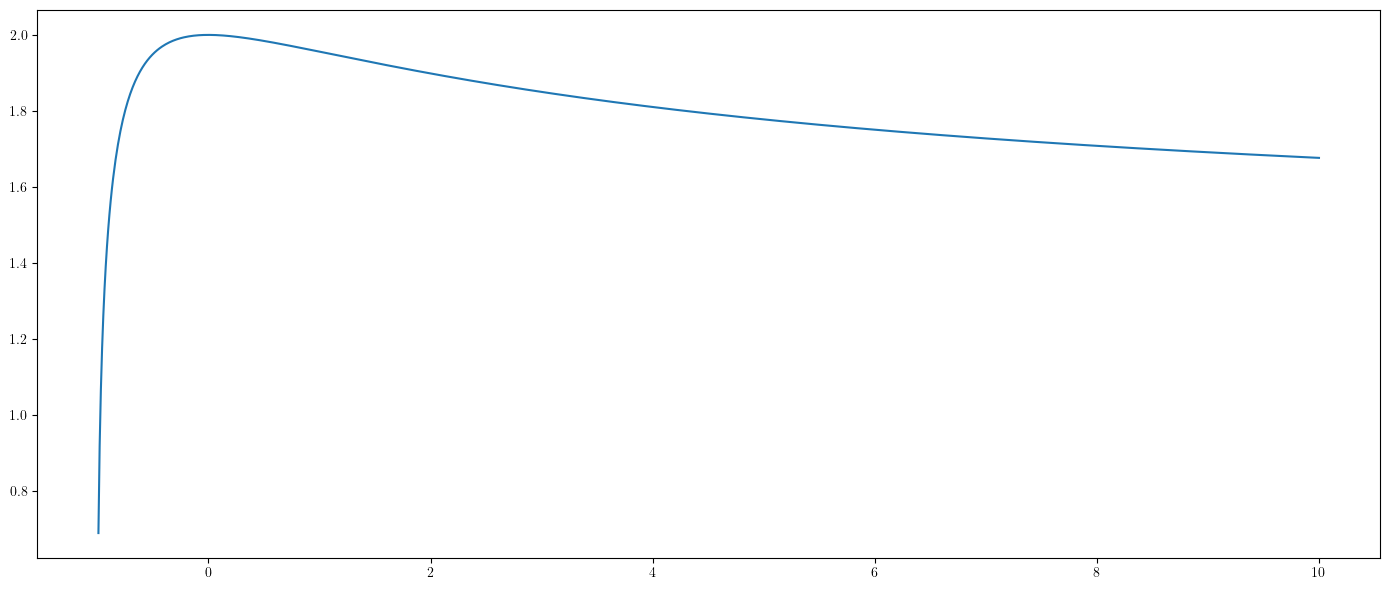

In [37]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

line_label = r"$$ E_Z = {0} E_{{SO,R}}$$"


k = list(trasmission_coeff_total.keys())
n = 0
# for k in trasmission_coeff_total.keys():

axs.plot(enn/E_SO_L, trasmission_coeff_total[1][0],
                   label=line_label.format(1))


# # axs.legend(fontsize = legend_font_size)
# # axs[i, j].grid(True)#which='both')
# axs.set_xlabel(x_label, fontdict=font)
# axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
# axs.yaxis.set_label_coords(*y_label_pos[0])
        
# x_magior = np.array([[1]])
# x_minor = np.array([[0.1]])

# y_magior = np.array([[0.5]])
# y_minor = np.array([[0.1]])
# adjuct_Tick(np.array([axs]), x_magior=x_magior, 
#                     x_minor=x_minor, 
#                     y_magior=y_magior, 
#                     y_minor=y_minor, 
#                     size =font["size"])

# fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=font["size"], y = 1.01)
      
# plt.savefig(BASE_PATH+"fig_2a_T(E)_for_E_(so,L)=0.2E_(so,R).pdf", 
#             transparent = False, 
#             bbox_inches='tight')
plt.show()